## LING 521: Applied English Grammar
### Text Analysis Script #1 
TODO: write up an intro

### Part 1. Load Dependencies
Import the required packages (install them if you haven't already)

In [1]:
import sys
import nltk
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import display, HTML

plt.rcdefaults()
#%matplotlib inline
%matplotlib notebook

Display my Python Package Library versions and verify software dependencies loaded:

In [2]:
print(f"sys.version: {sys.version}")
print(f"NLTK: {nltk.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")

#print(f"Scipy: {sp.__version__}")
#print(f"nose: {nose.__version__}")

sys.version: 3.7.5 (tags/v3.7.5:5c02a39a0b, Oct 15 2019, 00:11:34) [MSC v.1916 64 bit (AMD64)]
NLTK: 3.4.5
Numpy: 1.17.3
Pandas: 0.25.3
matplotlib: 3.1.1


### 2. Load Natural Language Processing Tool Kit (NLTK) Package
Load the following Part-of-Speech (POS) Taggers from the Natural Language Toolkit Library:

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('tagsets')
# Show definition of tags
# tagset_upenn = nltk.help.upenn_tagset()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

<b>NOTE ON FUNCTION WORDS:</b><br>
With respect to Function Words, we explored using the [NLTK Stopword corpus](https://www.nltk.org/book/ch02.html#stopwords_index_term)
when it was revealed to us that the NLTK's Stopword corpus, despite varying by domain, is basically 
[a manually currated 'general purpose' list of function words](https://stackoverflow.com/questions/41811790/function-vs-content-words#41813460)
 freely available to use in our tagger.

Ultimately we did not use it.  Instead we simply combined the following POS Tags in the NLTK 'Average Perceptron Tagger' 
into our own Function Word POS Tag and named it 'FUNCTOR':
 
| NLTK POS Tag | NLTK POS Term  | Longman POS  | Function Word Tag (New) |
| :-----------:|:--------------:| :-----------:|:-----------:|
| ADP          | Adpositions    | Prepositions | FUNCTOR     |
| PRON         | Pronouns       | Pronouns     | FUNCTOR     |
| DET          | Determiners    | Determiners  | FUNCTOR     |
| CONJ         | Conjunctions   | Coordinators / </br> Subordinators| FUNCTOR     |


https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk

- X Determiners
- X Pronouns
- Auxiliary Verbs: https://www.wikiwand.com/en/Auxiliary_verb
- X Prepositions
- Adverbial Particles
Noun
adverbial particle (plural adverbial particles)

(linguistics) The adverbial component of a phrasal verb; a word, typically a short one, which functions as an adverb accompanying and qualifying the verb component of a phrasal verb.
In the phrasal verbs 'set up', 'throw away', 'shut down', 'carry out' and 'take over', the words 'up', 'away', 'down', 'out' and 'over' are the adverbial particles.
The sentence 'He turns on everyone he meets' has very different meanings depending on whether the word 'on' is parsed as a preposition or as an adverbial particle.

X Coordinators
X Subordinators

- Wh-words
- Single-word classes (page 33, section 2.5.2 Single-word classes
- Numerals
- 



 
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = set(stopwords.words("english"))

### 3. Load Corpora:

##### Insert Words

We did not make an exhastive list of insert words.  There are methods to create 

In [4]:
insert_words = ('yeah', 'Ok', 'ahh', 'yeah', 'bye')

messages = ['Gym?',
            'yeah be there in about a half',
            'Ok see you when you get here!',
            'Seconds away',
            'Meet me between smith and cramer asap',
            'I got you and Taylor tix in pit section.',
            'Get some milk please',
            'Chk email',
            'Made it',
            'Do u know where u saved that movie on my compute',
            'Im meeting some dude from the internet for happy hour ahh!',
            'Wed is dinner for renetta call us soon',
            'where r u???',
            'pinball']

### 4. Tag POS in 2007 Text Messages:
Iterate thru each text message in our 2007 Text Message Corpus and tag the PART-OF-SPEECH of each word.

<b>NOTE:</b> We could have written this code to simply get the counts on the whole corpus,
but for this assignment, message level analysis made it easier to confirm with manual counts.

This is how the tagset would look like if we simply used the upenn tagset:<br>
Counter({'NOUN': 29, 'VERB': 12, 'ADP': 9, 'ADV': 8, 'PRON': 8, '.': 7, 'DET': 4, 'ADJ': 3, 'CONJ': 2})

However, in order to satisfy the requirements, we need to modify our tagset as follows:
1. Inserts: Check if a word is in our inserts set
2. Function Words: Combine ADP, PRON, DET, CONJ into FUNCTOR
3. Remove Punctuation

In [5]:
counter_list = []
words = defaultdict(list)

for msg in messages:
    tokens = nltk.word_tokenize(msg)
    word_tag_pairs = nltk.pos_tag(tokens, tagset='universal')
    print(f"\nRaw Message: {msg}")
    print(f"Words with POS Tags: {word_tag_pairs}")

    # Build a dictionary of words, grouped by POS
    for w, tag in word_tag_pairs:
        if w in insert_words:
            tag = "Inserts"
            words[tag].append(w)
        elif tag in ('PRON', 'DET', 'ADP', 'CONJ'):
            tag = "FUNCTOR"
            words[tag].append(w)
        elif tag != '.':
            words[tag].append(w)



Raw Message: Gym?
Words with POS Tags: [('Gym', 'NOUN'), ('?', '.')]

Raw Message: yeah be there in about a half
Words with POS Tags: [('yeah', 'ADV'), ('be', 'VERB'), ('there', 'ADV'), ('in', 'ADP'), ('about', 'ADP'), ('a', 'DET'), ('half', 'NOUN')]

Raw Message: Ok see you when you get here!
Words with POS Tags: [('Ok', 'NOUN'), ('see', 'VERB'), ('you', 'PRON'), ('when', 'ADV'), ('you', 'PRON'), ('get', 'VERB'), ('here', 'ADV'), ('!', '.')]

Raw Message: Seconds away
Words with POS Tags: [('Seconds', 'VERB'), ('away', 'ADV')]

Raw Message: Meet me between smith and cramer asap
Words with POS Tags: [('Meet', 'VERB'), ('me', 'PRON'), ('between', 'ADP'), ('smith', 'NOUN'), ('and', 'CONJ'), ('cramer', 'NOUN'), ('asap', 'NOUN')]

Raw Message: I got you and Taylor tix in pit section.
Words with POS Tags: [('I', 'PRON'), ('got', 'VERB'), ('you', 'PRON'), ('and', 'CONJ'), ('Taylor', 'NOUN'), ('tix', 'NOUN'), ('in', 'ADP'), ('pit', 'ADJ'), ('section', 'NOUN'), ('.', '.')]

Raw Message: Get s

#### Sum of totals:

In [6]:
counter_pos = {k: len(v) for k,v in words.items()}
total_words = sum(counter_pos.values())

print(f"\nPOS Counts: {counter_pos}")
print(f"\nTotal Words: {total_words}")


POS Counts: {'NOUN': 27, 'Inserts': 3, 'VERB': 12, 'ADV': 7, 'FUNCTOR': 23, 'ADJ': 3}

Total Words: 75


#### Summary: Words grouped by POS:

In [7]:
row_labels = ['Nouns', 'Verbs', 'Adjectives', 'Adverbs', 'Function Words', 'Inserts']
words_by_pos = [ ', '.join(words['NOUN']), ', '.join(words['VERB']), ', '.join(words['ADJ']),   
                 ', '.join(words['ADV']), ', '.join(words['FUNCTOR']), ', '.join(words['Inserts']) ]   
data = {'Word Class': row_labels,
        'Words': words_by_pos}
df = pd.DataFrame(data, columns=['Word Class', 'Words'])

# Set table styles
styles = [ dict(selector="th", props=[('text-align', 'center')]),
           dict(selector="th", props=[('white-space', 'nowrap')]),
           dict(selector="td", props=[('text-align', 'left')]) ]
styled_df = (df.style
             .set_properties(subset=df.columns[0],  **{'white-space':'nowrap'})
             .set_table_styles(styles))

html = styled_df.hide_index().render()
display(HTML(html))

Word Class,Words
Nouns,"Gym, half, smith, cramer, asap, Taylor, tix, section, milk, please, Chk, email, u, movie, compute, Im, meeting, dude, internet, hour, Wed, dinner, renetta, call, r, u, pinball"
Verbs,"be, see, get, Seconds, Meet, got, Get, Made, Do, know, saved, is"
Adjectives,"pit, u, happy"
Adverbs,"there, when, here, away, where, soon, where"
Function Words,"in, about, a, you, you, me, between, and, I, you, and, in, some, it, that, on, my, some, from, the, for, for, us"
Inserts,"yeah, Ok, ahh"


### 5.  Calculate Percentages and Normed Frequencies

In [8]:
# Gather Counts
raw_counts = counter_pos
percentages = {pos: wc / total_words for pos, wc in raw_counts.items()}
norm_counts = {pos: wc / total_words * 1000 for pos, wc in raw_counts.items()}

row_labels = ['Nouns', 'Verbs', 'Adjectives', 'Adverbs', 'Function Words', 'Inserts']
raw_counts_list = [ counter_pos['NOUN'], counter_pos['VERB'], counter_pos['ADJ'], counter_pos['ADV'], 
                    counter_pos['FUNCTOR'], counter_pos['Inserts'], ]

percentages_list = [ percentages['NOUN'], percentages['VERB'], percentages['ADJ'], percentages['ADV'], 
                     percentages['FUNCTOR'], percentages['Inserts'], ]

norm_counts_list = [ norm_counts['NOUN'], norm_counts['VERB'], norm_counts['ADJ'], norm_counts['ADV'], 
                     norm_counts['FUNCTOR'], norm_counts['Inserts'], ]

data = {'Word Class': row_labels,
        'Raw Counts': raw_counts_list,
        'Percentages':percentages_list,
        'Normed per 1000': norm_counts_list }

df = pd.DataFrame(data, columns=['Word Class', 'Raw Counts', 'Percentages', 'Normed per 1000'])
df.loc[df.index.max()+1]=['Total']+df.sum().tolist()[1:]

# Construct a mask of which columns are numeric
numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))
# Set table styles
styles = [ dict(selector="th", props=[('text-align', 'center')]) ]

styled_df = (df.style
                # Format the percentage and Normed per 1000 fields
                .format({'Percentages': "{:.1%}",  'Normed per 1000': "{:,.1f}"})
                # right-align the numeric columns and set their width
                .set_properties(subset=df.columns[numeric_col_mask],  **{'text-align':'right'})
                # left-align the non-numeric columns and set their width
                .set_properties(subset=df.columns[~numeric_col_mask], **{'text-align':'left'})
                # center the header
                .set_table_styles(styles) 
            )

html = styled_df.hide_index().render()
display(HTML(html))

Word Class,Raw Counts,Percentages,Normed per 1000
Nouns,27,36.0%,360.0
Verbs,12,16.0%,160.0
Adjectives,3,4.0%,40.0
Adverbs,7,9.3%,93.3
Function Words,23,30.7%,306.7
Inserts,3,4.0%,40.0
Total,75,100.0%,"1,000.0"


### 5.  Plot Stacked Bar Chart
Create a stacked bar graph displaying the raw counts, percentages, and normed frequencies per 1000 words for the lexical classes.

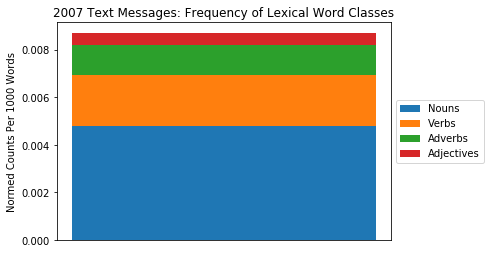

In [9]:
# Graph it!
width = 0.7

raw_counts = counter_pos
percentages = {pos: wc / total_words for pos, wc in raw_counts.items()}
norm_counts = {pos: pct / total_words for pos, pct in percentages.items()}

p1 = plt.bar(width=width, x=1, height=norm_counts['NOUN'])
p2 = plt.bar(width=width, x=1, height=norm_counts['VERB'], bottom=norm_counts['NOUN'])
p3 = plt.bar(width=width, x=1, height=norm_counts['ADV'], bottom=norm_counts['NOUN'] + norm_counts['VERB'])
p4 = plt.bar(width=width, x=1, height=norm_counts['ADJ'], bottom=norm_counts['NOUN'] + norm_counts['VERB'] + norm_counts['ADV'])

plt.ylabel('Normed Counts Per 1000 Words')
plt.title('2007 Text Messages: Frequency of Lexical Word Classes')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

max_y_value = total_words * 1000
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=(p1[0], p2[0], p3[0], p4[0]), labels=('Nouns', 'Verbs', 'Adverbs', 'Adjectives'))
#plt.autoscale(False)

### 6.  Summary
Summary Write-up

##### Footer: used to force updates
Last Updated: 11/12/2019 1:27 PM  